# Homework 8 (DL Friday, November 17 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023

### Question:  Consider the scalar differential equation
\begin{equation}
\dot{x} = a x + u, \qquad x(0) = x_0,
\end{equation}
###  where $u = u(t)$ is some given input function.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


### Part a (2 points):  With discretization step $dt$, form discretization of the model with zeroth-order-hold (ZOH) approximation in form
\begin{equation}
x_n = f_n x_{n−1} + l_n u_{n−1}.
\end{equation}

### In the section below, implement the solution of $f_n$ and $l_n$:

In [44]:
def discretized_model_parameters_zoh(a, dt):
    """ Implement parameters f_n and l_n of discretized dynamic model such that x_n = f_n x_{n-1} + l_n u_{n-1}
    Input:
        a: parameter of the given continous time model in the question 
        dt: discretization step
    Output:
        f_n and l_n
    """
    # f_n = ?
    # l_n = ?
    f_n = np.exp(a*dt)
    l_n = (np.exp(a*dt)-1)/a
    # raise NotImplementedError()
    return f_n, l_n # do not change this line, do not change the order of output

In [45]:
"""Check the result for several inputs"""
assert np.allclose(discretized_model_parameters_zoh(-0.3, 0.01)[0], 0.997, rtol=1e-03, atol=1e-04)

In [46]:
"""Check the result for several inputs"""
assert np.allclose(discretized_model_parameters_zoh(-0.3, 0.01)[1], 0.01, rtol=1e-03, atol=1e-04)

### Part b (1 point): Implement the trajectory of the discretized model

In [47]:
def x_trajectory(x0, steps, a , dt, ut):
    """ Implement trajectory of discretized dynamic model --> x_n = f_n x_{n-1} + l_n u_{n-1}
    Input:
        x0: initial point
        steps: total time steps
        a: parameter of the given continuous time model in the question 
        dt: discretization step
        ut: input of the continuous time model
    Output:
        x: trajectory of x
    """
    x = np.zeros((steps,))
    x[0] = x0 
    # implement the trajectory
    # you could use discretized_model_parameters_zoh(a, dt) - note that it has two outputs 
    f_n, l_n = discretized_model_parameters_zoh(a, dt) 
    for i in range(1,len(x)):
        x[i] = f_n * x[i-1] + l_n * ut
    
    
    # raise NotImplementedError()
    return x

In [48]:
"""Check the result for the given inputs"""
assert np.allclose(x_trajectory(3., 100, -0.5 , 0.1, 1.)[0], 3.0, rtol=1e-03, atol=1e-04)
assert (x_trajectory(3., 100, -0.5 , 0.1, 1.)[2] - x_trajectory(3., 100, -0.5 , 0.1, 1.)[0] < 0)
assert (x_trajectory(3., 100, -0.5 , 0.1, 1.)[-1] - x_trajectory(3., 100, -0.5 , 0.1, 1.)[-5] < 0)

Uncomment and then Run the code below to see the trajectory By assuming that $u(t) = 1$, and $dt = 0.1$ and with $a = −1/2$ and $x_0 = 3$, and steps= $100$

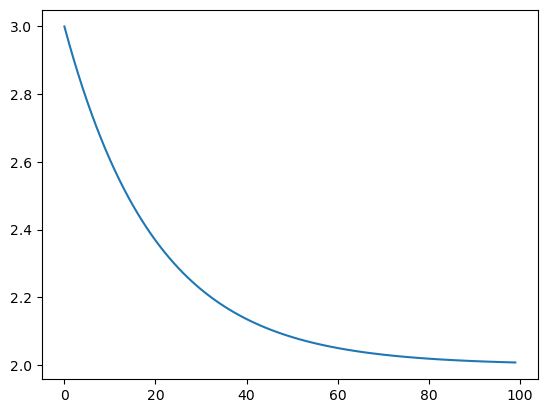

In [49]:
x0_ = 3.
a_ = -0.5
dt_ = 0.1
ut_ = 1
steps_ = 100
plt.plot(x_trajectory(x0_, steps_, a_ , dt_, ut_));

### Part c (1 point): Solve the equation using builtin ODE solver (Python’s odeint) and check that the solution matches the above at the discretization points.

In [50]:
# do not change this function
def odefun(t, x, a, u):
    return a * x + u

### In the section below, use odeint to find the solution of the ode.
Hint: in this part, your main task is to revisit 'odeint' function in 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html', 

and realize what you need to consider for 'tfirst' and 'args' input parameters of 'odeint' based on function 'odefun' presented above.

In [51]:
def builtin_ODE_solver(x0, steps, dt, ode_function, a, u):
    T = np.arange(0, steps*dt, dt)
    # x_builtin_ODE_solver = ?
    x_builtin_ODE_solver = odeint(ode_function, x0, T, tfirst=True, args=(a,u))
    # raise NotImplementedError()
    return x_builtin_ODE_solver

In [52]:
"""Check the result for the given inputs"""
assert np.allclose(builtin_ODE_solver(3., 100, 0.1, odefun, -0.5 , 1.)[0], 3.0, rtol=1e-03, atol=1e-04)
assert (builtin_ODE_solver(3., 100, 0.1, odefun, -0.5 , 1.)[2] - builtin_ODE_solver(3., 100, 0.1, odefun, -0.5 , 1.)[0] < 0)
assert (builtin_ODE_solver(3., 100, 0.1, odefun, -0.5 , 1.)[-1] - builtin_ODE_solver(3., 100, 0.1, odefun, -0.5 , 1.)[-5] < 0)

Run the code below to see that the solution matches the above at the discretization points.

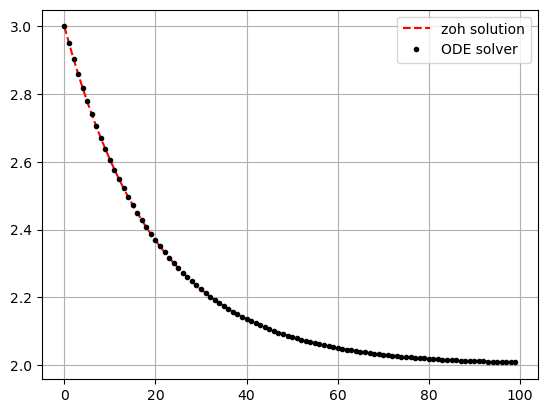

In [53]:
plt.plot(x_trajectory(x0_, steps_, a_ , dt_, ut_), 'r--',  label = 'zoh solution')
plt.plot(builtin_ODE_solver(x0_, steps_, dt_, odefun, a_, ut_), 'k.',  label = 'ODE solver')
plt.grid()
plt.legend();